<a href="https://colab.research.google.com/github/Puneeth-Abhishek-6622/Round-4-IIITH/blob/main/SER_cnn__model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/round 4 iit hyd/Indian Emotional Speech Corpora (IESC)"

import os
os.listdir(file_path)

['Speaker-2',
 'Speaker-8',
 'Speaker-5',
 'Speaker-4',
 'Speaker-3',
 'Speaker-1',
 'Speaker-6',
 'Speaker-7']

In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Define dataset path
file_path = "/content/drive/MyDrive/round 4 iit hyd/Indian Emotional Speech Corpora (IESC)"

# Emotion mapping
emotion_map = {
    'Anger': 0,
    'Fear': 1,
    'Happy': 2,
    'Neutral': 3,
    'Sad': 4
}

# Function to extract features from an audio file
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=16000)  # Load audio file

    # Extract features
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))  # Zero Crossing Rate
    rmse = np.mean(librosa.feature.rms(y=y))  # Root Mean Square Energy
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40), axis=1)  # 40 MFCCs
    mel_spec = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128), axis=1)  # 128 Mel Spectrogram

    # Combine features into a single array
    features = np.hstack([zcr, rmse, mfccs, mel_spec])  # Stack features together
    return features

# Extract features and labels
features = []
labels = []

# Loop through each speaker and emotion folder
for speaker in os.listdir(file_path):
    speaker_path = os.path.join(file_path, speaker)
    if os.path.isdir(speaker_path):  # Check if it's a directory
        for emotion in os.listdir(speaker_path):
            emotion_path = os.path.join(speaker_path, emotion)
            if os.path.isdir(emotion_path):  # Check if it's a directory
                for file in os.listdir(emotion_path):
                    if file.endswith(".wav"):  # Process only .wav files
                        file_full_path = os.path.join(emotion_path, file)

                        # Extract features
                        feature_vector = extract_features(file_full_path)

                        # Store features and labels
                        features.append(feature_vector)
                        labels.append(emotion_map[emotion])

# Convert lists to NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Print dataset shape
print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")


Features shape: (400, 170)
Labels shape: (400,)


In [ ]:
# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Print the shapes
print(f"Training set: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {X_test.shape}, Labels: {y_test.shape}")


Training set: (320, 170), Labels: (320,)
Test set: (80, 170), Labels: (80,)


In [ ]:
print(y_train[:5])  # Check the first few labels
print(type(y_train[0]))  # Check type of labels


[0 4 3 1 0]
<class 'numpy.int64'>


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)  # Use transform() to avoid label mismatch


features

In [ ]:
# Convert to Pandas DataFrame
df = pd.DataFrame(features, columns=[f'MFCC_{i}' for i in range(40)] + [f'Mel_{i}' for i in range(128)] + ['ZCR', 'RMSE'])
df['Emotion'] = labels  # Add labels column

# Display first few rows
print(df.head())


     MFCC_0    MFCC_1      MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6  \
0  0.127835  0.074360 -306.217712  85.516487  30.160650  -6.302739 -15.246192   
1  0.106596  0.065106 -335.680511  80.729218  16.819489  -9.078341 -18.069967   
2  0.085236  0.067849 -353.019897  93.430397  18.866234  -1.211237 -17.915480   
3  0.119296  0.075322 -319.859680  91.205795  31.728710 -11.441105 -10.554805   
4  0.093058  0.053817 -350.667877  78.844505  18.476913  -3.559233 -22.873520   

     MFCC_7     MFCC_8     MFCC_9  ...   Mel_121   Mel_122   Mel_123  \
0 -6.026753  -7.872281  -2.753611  ...  0.033967  0.059028  0.066669   
1  1.215997 -10.459587 -12.095194  ...  0.005643  0.002397  0.003379   
2 -0.164225  -5.334225  -9.696145  ...  0.002794  0.002510  0.002267   
3 -6.371383  -5.126802   2.769657  ...  0.003528  0.008465  0.016997   
4  1.624290  -1.158887  -9.210607  ...  0.002287  0.003747  0.002251   

    Mel_124   Mel_125   Mel_126   Mel_127       ZCR      RMSE  Emotion  
0  0.05

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df.drop(columns=['Emotion']).values  # Feature matrix
y = df['Emotion'].values  # Labels

# Train-test split (stratified to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print shapes to verify
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")


Training set: (320, 170), Testing set: (80, 170)


normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Print sample values
print(f"Sample normalized features (first row): {X_train[0]}")


Sample normalized features (first row): [ 0.83368687 -0.50452595  0.26808351 -0.67211197 -0.27794192 -0.38694615
  0.83267806 -1.31752646 -0.83028153 -1.22785885 -2.40337577 -1.20444019
 -1.98077724 -1.72552295 -1.56733283 -0.48696473 -0.71236221 -0.4718711
 -2.33008021 -1.66359402 -1.64682467 -1.45569758 -0.67073799  0.03719221
 -0.81092606  0.08731246 -1.07809848 -0.99268055  0.5511213  -0.5283139
  0.60719747  1.2510933   0.84924787  1.84019106  1.71084188  2.4314993
  2.30366536  2.02488289  1.71735243  0.25976724  0.60390206  0.2691493
 -0.39281647 -0.51738749 -0.50364029 -0.36259398 -0.43256203 -0.47007957
 -0.2532219   0.1772477  -0.16540101 -0.56680865  0.05086491 -0.12478656
 -0.52931749 -0.38846787  0.01230631  0.25847446  0.91912428  0.4750649
 -0.36201261 -0.44180554 -0.6269365  -0.36964925 -0.30040365 -0.44908065
 -0.49395294 -0.46977524 -0.45779412 -0.4168109  -0.44567708 -0.40474235
 -0.49615939 -0.49244316 -0.49439122 -0.46962421 -0.39133834 -0.45590498
 -0.37236175 -0.

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(features.shape[1], 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    Dropout(0.3),  # Dropout added

    tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)),  # L2 regularization
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    Dropout(0.3),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),  # More dropout
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 168, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 168, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_8 (MaxPooling1D)       │ (None, 84, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 84, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 82, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 82, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 41, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 41, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 5248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │         671,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 698,245 (2.66 MB)

 Trainable params: 697,861 (2.66 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5399 - loss: 1.5255 - val_accuracy: 0.5125 - val_loss: 1.5114
Epoch 2/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.5583 - loss: 1.2907 - val_accuracy: 0.4000 - val_loss: 1.5154
Epoch 3/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5903 - loss: 1.3677 - val_accuracy: 0.3750 - val_loss: 1.5435
Epoch 4/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6416 - loss: 1.2965 - val_accuracy: 0.3375 - val_loss: 1.5951
Epoch 5/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6090 - loss: 1.1216 - val_accuracy: 0.3000 - val_loss: 1.6552
Epoch 6/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6065 - loss: 1.2309 - val_accuracy: 0.3125 - val_loss: 1.7269
Epoch 7/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7097 - loss: 0.9478 - val_accuracy: 0.3125 - val_loss: 1.8013
Epoch 8/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6701 - loss: 1.0776 - val_accuracy: 0.3000 - v

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce LR when validation loss stops improving
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,  # Reduce LR by half
    patience=3,  # Wait for 3 epochs before reducing LR
    min_lr=1e-6  # Minimum possible LR
)

# Train with LR scheduler
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80, batch_size=32, callbacks=[early_stopping, reduce_lr], verbose=1)


Epoch 1/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.4743 - loss: 2.0999 - val_accuracy: 0.5750 - val_loss: 1.5312 - learning_rate: 0.0010
Epoch 2/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5822 - loss: 1.4346 - val_accuracy: 0.4750 - val_loss: 1.4611 - learning_rate: 0.0010
Epoch 3/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.6747 - loss: 1.1323 - val_accuracy: 0.3875 - val_loss: 1.4658 - learning_rate: 0.0010
Epoch 4/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7001 - loss: 0.8442 - val_accuracy: 0.3750 - val_loss: 1.5228 - learning_rate: 0.0010
Epoch 5/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7341 - loss: 0.7486 - val_accuracy: 0.3750 - val_loss: 1.5965 - learning_rate: 0.0010
Epoch 6/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8135 - loss: 0.6245 - val_accuracy: 0.3500 - val_loss: 1.6975 - learning_rate: 5.0000e-04
Epoch 7/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8337 - loss: 0.5863 - val

In [ ]:
import tensorflow as tf

# Use Adam optimizer with a lower learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # Reduce LR from default 0.001 to 0.0001

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate when validation loss stops improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, callbacks=[reduce_lr])


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.8911 - loss: 0.3293 - val_accuracy: 0.8500 - val_loss: 0.8313 - learning_rate: 1.0000e-04
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9320 - loss: 0.3109 - val_accuracy: 0.8250 - val_loss: 0.8771 - learning_rate: 1.0000e-04
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9270 - loss: 0.3412 - val_accuracy: 0.8500 - val_loss: 0.8695 - learning_rate: 1.0000e-04
Epoch 4/50
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9136 - loss: 0.2822
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9123 - loss: 0.2847 - val_accuracy: 0.8500 - val_loss: 0.8751 - learning_rate: 1.0000e-04
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8952 - loss: 0.3463 - val_accuracy: 0.8375 - val_loss: 0.8738 - learning_rate: 5.0000e-05
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8970 - los

In [ ]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8531 - loss: 1.0909
Test Accuracy: 86.25%


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Compare with actual labels
print("Predictions:", y_pred_labels[:10])
print("Actual:", y_test[:10])


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predictions: [1 2 3 0 4 2 3 2 4 3]
Actual: [1 2 3 3 4 2 1 2 4 3]


              precision    recall  f1-score   support

           0       0.87      0.81      0.84        16
           1       1.00      0.81      0.90        16
           2       1.00      0.88      0.93        16
           3       0.61      0.88      0.72        16
           4       1.00      0.94      0.97        16

    accuracy                           0.86        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.90      0.86      0.87        80



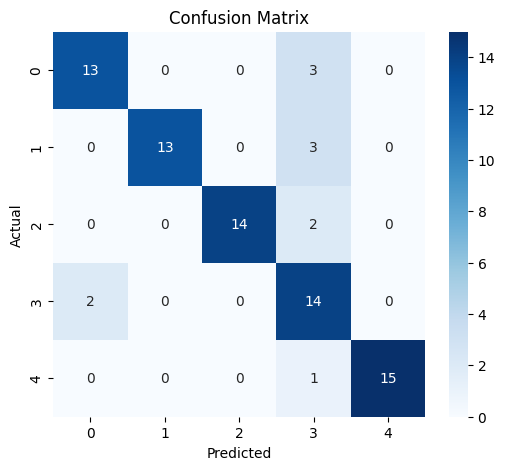

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate classification report
print(classification_report(y_test, y_pred_labels))

# Generate confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=emotion_map.values(), yticklabels=emotion_map.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


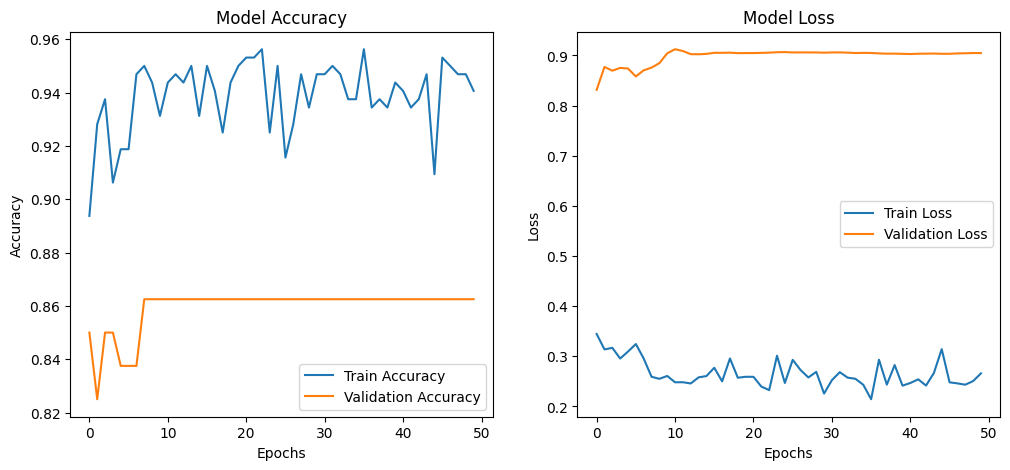

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the variable storing model training history
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


saving the model

In [ ]:
model.save("speech_emotion_recognition_model.h5")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("speech_emotion_recognition_model.h5")


In [ ]:
import librosa
import numpy as np

def predict_emotion(file_path, model):
    y, sr = librosa.load(file_path, sr=16000)

    # Extract features (same as during training)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    rmse = np.mean(librosa.feature.rms(y=y))
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40), axis=1)
    mel_spec = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128), axis=1)

    features = np.hstack([zcr, rmse, mfccs, mel_spec])
    features = features.reshape(1, -1)  # Reshape for prediction

    # Normalize features before prediction (using training mean & std)
    features = (features - np.mean(features)) / np.std(features)

    # Predict emotion
    predicted_class = np.argmax(model.predict(features))

    emotion_map = {0: 'Anger', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad'}
    return emotion_map[predicted_class]

# Example usage
emotion = predict_emotion("/content/drive/MyDrive/round 4 iit hyd/Indian Emotional Speech Corpora (IESC)/Speaker-1/Happy/H-4-1-2.wav", model)
print("Predicted Emotion:", emotion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Predicted Emotion: Anger


In [ ]:
print("Extracted Features Shape:", features.shape)
print("Extracted Features:", features)


Extracted Features Shape: (400, 170)
Extracted Features: [[ 1.27835360e-01  7.43595883e-02 -3.06217712e+02 ...  9.40517429e-03
   5.51378215e-03  3.97043210e-03]
 [ 1.06595952e-01  6.51062801e-02 -3.35680511e+02 ...  1.85015937e-03
   1.14658661e-03  5.61059278e-04]
 [ 8.52362450e-02  6.78485185e-02 -3.53019897e+02 ...  1.16837281e-03
   4.18672775e-04  8.87684437e-05]
 ...
 [ 2.24375849e-01  3.59476395e-02 -4.45410309e+02 ...  3.32030962e-04
   1.46687060e-04  1.15642988e-05]
 [ 2.11985980e-01  4.54305150e-02 -3.83239532e+02 ...  3.02793720e-04
   1.04520746e-04  6.65765083e-06]
 [ 2.05917485e-01  4.01325859e-02 -4.28446289e+02 ...  6.25886314e-04
   1.97634610e-04  1.40366210e-05]]


In [ ]:
print(model.input_shape)


(None, 170, 1)


In [ ]:
import librosa
import numpy as np
import pickle  # To save and load scaler

def predict_emotion(file_path, model, scaler):
    y, sr = librosa.load(file_path, sr=16000)

    # Extract features (same as during training)
    zcr = np.mean(librosa.feature.zero_crossing_rate(y))
    rmse = np.mean(librosa.feature.rms(y=y))
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40), axis=1)
    mel_spec = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128), axis=1)

    features = np.hstack([zcr, rmse, mfccs, mel_spec])
    features = features.reshape(1, -1)  # Reshape for prediction

    # 🔹 **Apply StandardScaler (important!)**
    features = scaler.transform(features)

    # Predict emotion
    predicted_class = np.argmax(model.predict(features))

    emotion_map = {0: 'Anger', 1: 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad'}
    return emotion_map[predicted_class]

# 🔹 **Save the scaler after training (Only once)**
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# 🔹 **Load the scaler before prediction**
with open("scaler.pkl", "rb") as f:
    loaded_scaler = pickle.load(f)

# Example usage
emotion = predict_emotion("/content/drive/MyDrive/round 4 iit hyd/Test_Data/Speaker-7/Neutral/N-10-7-1.wav", model, loaded_scaler)
print("Predicted Emotion:", emotion)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Predicted Emotion: Neutral


In [ ]:
emotion = predict_emotion("/content/drive/MyDrive/round 4 iit hyd/Indian Emotional Speech Corpora (IESC)/Speaker-1/Sad/S-4-1-2.wav", model, loaded_scaler)
print("Predicted Emotion:", emotion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted Emotion: Sad
